In [30]:
# Connect google drive to google colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [31]:
main_datasets_path = '/content/drive/MyDrive/AVD/Trabajos_3_4/Datasets/'

# Clasificación de películas usando los intervalos creados:

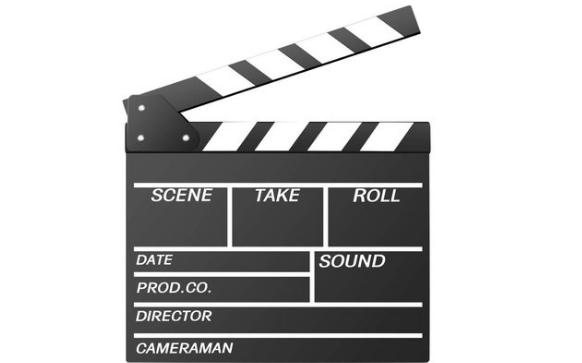

Para el ejercicio de clasificación se van a crear 4 clases dónde convertimos los imdb_scores a rangos de valores:

- Valores entre 0 y 4 siginificarán la categoría 0 (películas mal valoradas)
- Valores entre 4 y 6 siginificarán la categoría 1 (películas valoradas en la media)
- Valores entre 6 y 8 siginificarán la categoría 2 (películas bien valoradas)
- Valores entre 8 y 10 siginificarán la categoría 3 (películas muy bien valoradas)


# Cargamos nuestros datos

In [32]:
import pandas as pd

# Training data (features)
X = pd.read_csv(main_datasets_path+'tmdb_predefined_features.csv')
X.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,...,language_da,language_de,language_en,language_es,language_fr,language_hi,language_it,language_ja,language_ko,language_zh
0,4.585146,3.113586,-0.262113,0.054284,-0.432285,20.449494,886204,4834,0.0,3054.0,...,0,0,1,0,0,0,0,0,0,0
1,1.133250,2.703168,-0.079794,0.133318,2.048429,19.550159,471220,48350,0.0,1238.0,...,0,0,1,0,0,0,0,0,0,0
2,3.593033,1.745528,-0.262113,-0.323989,0.203796,19.114199,275868,11700,1.0,994.0,...,0,0,1,0,0,0,0,0,0,0
3,5.323081,2.475159,6.862262,12.124679,1.221525,19.920595,1144337,106759,0.0,2701.0,...,0,0,1,0,0,0,0,0,0,0
4,2.445134,1.015897,-0.108291,-0.122861,-0.455184,18.106774,212204,1873,1.0,738.0,...,0,0,1,0,0,0,0,0,0,0


In [33]:
# Labels (0, 1, 2, 3)
Y = pd.read_csv(main_datasets_path+'tmdb_classification_labels.csv')
Y.head()

,imdb_binned_score
0,2
1,2
2,2
3,3
4,2


In [34]:
# Film titles (names)
names = pd.read_csv(main_datasets_path+'fused_tmdb_imdb_titles.csv')
names.head()

,original_title
0,Avatar
1,Pirates of the Caribbean At World's End
2,Spectre
3,The Dark Knight Rises
4,John Carter


In [35]:
from sklearn.model_selection import train_test_split

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
X_train, X_test, Y_train_names, Y_test_names = train_test_split(X, names, test_size=0.2, random_state=42)

In [36]:
X.shape

(3618, 168)

In [37]:
#hace falta normalizar los datos? (todas las columnas son numéricas)
#en notebook 0 normaliza (usando StandardScaler) las features de facebook


# Entrenamiento y evaluación de los resultados

Seleccione 3 algoritmos diferentes de aprendizaje automático (machine learning) y entrénelos con los parámetros por defecto empleando los datos proporcionados (X_train, X_test, Y_train, Y_test). Evalúe los resultados utilizando todas las métricas de evaluación que conozca vistas en la asignatura. Al ser una clasificación con 4 clases se pueden emplear gran cantidad de métricas: accuracy, recall, sensitivity, confusion matrix, curvas ROC y AUC. Realize un análisis exhaustivo de los resultados. Tras cada parte de código que desarrolle añada una celda de texto comentando que es lo que ha realizado y los resultados obtenidos. Incluya todos los gráficos que considere oprotunos.

Tras haber definido los conjuntos de entrenamiento y validación, definimos los distintos modelos de machine learning con los que vamos a trabajar. Dichos modelos serán: Random Forest, KNN y MLP. Además de esto, definiremos también el accuracy, el classification report y la matriz de confusión. Con estas 3 definiciones podremos observar el valor de algunas métricas directamente y podremos sacar otras a partir de lo que obtengamos. Por ejemplo, podríamos sacar más métricas a partir de la matriz de confusión.

Además de los 3 modelos mencionados, hemos probado otros modelos como SVC o Gradient Boosting. Finalmente, hemos acabado descartando estos modelos.

In [38]:
# Desarrolle el código en los bloques siguientes (utilice todos los que necesite)

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier


# Inicializar los modelos
rf_model = RandomForestClassifier(random_state=42)
svc_model = SVC(random_state=42)
gb_model = GradientBoostingClassifier()
knn_model = KNeighborsClassifier()


# Entrenar los modelos
rf_model.fit(X_train, Y_train)
svc_model.fit(X_train, Y_train)
gb_model.fit(X_train, Y_train)
knn_model.fit(X_train, Y_train)

# Predecir con los modelos entrenados
rf_pred = rf_model.predict(X_test)
svc_pred = svc_model.predict(X_test)
gb_pred = gb_model.predict(X_test)
knn_pred = knn_model.predict(X_test)

# Calcular métricas de evaluación
rf_accuracy = accuracy_score(Y_test, rf_pred)
svc_accuracy = accuracy_score(Y_test, svc_pred)
gb_accuracy = accuracy_score(Y_test, gb_pred)

rf_report = classification_report(Y_test, rf_pred)
svc_report = classification_report(Y_test, svc_pred)
gb_report = classification_report(Y_test, gb_pred)

rf_conf_matrix = confusion_matrix(Y_test, rf_pred)
svc_conf_matrix = confusion_matrix(Y_test, svc_pred)
gb_conf_matrix = confusion_matrix(Y_test, gb_pred)


knn_accuracy = accuracy_score(Y_test, knn_pred)
knn_report = classification_report(Y_test, knn_pred)
knn_conf_matrix = confusion_matrix(Y_test, knn_pred)



<ipython-input-39-eeab3782030a>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train, Y_train)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit

In [40]:
from sklearn.neural_network import MLPClassifier

# Inicializar el modelo MLP
mlp_model = MLPClassifier(random_state=42)

# Entrenar el modelo
mlp_model.fit(X_train, Y_train)

# Predecir con el modelo entrenado
mlp_pred = mlp_model.predict(X_test)

# Calcular métricas de evaluación
mlp_accuracy = accuracy_score(Y_test, mlp_pred)
mlp_report = classification_report(Y_test, mlp_pred)
mlp_conf_matrix = confusion_matrix(Y_test, mlp_pred)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMe

Imprimimos los resultados de los distintos modelos entrenados.

In [41]:
print("Random Forest Classifier Accuracy:", rf_accuracy)
print("Random Forest Classifier Report:\n", rf_report)
print("Random Forest Classifier Confusion Matrix:\n", rf_conf_matrix)


Random Forest Classifier Accuracy: 0.9737569060773481
Random Forest Classifier Report:
               precision    recall  f1-score   support

           0       1.00      0.27      0.42        15
           1       0.95      1.00      0.97       202
           2       0.99      1.00      0.99       487
           3       0.93      0.65      0.76        20

    accuracy                           0.97       724
   macro avg       0.97      0.73      0.79       724
weighted avg       0.97      0.97      0.97       724

Random Forest Classifier Confusion Matrix:
 [[  4  11   0   0]
 [  0 202   0   0]
 [  0   0 486   1]
 [  0   0   7  13]]


In [42]:
print("Support Vector Classifier Accuracy:", svc_accuracy)
print("Support Vector Classifier Report:\n", svc_report)
print("Support Vector Classifier Confusion Matrix:\n", svc_conf_matrix)


Support Vector Classifier Accuracy: 0.6781767955801105
Support Vector Classifier Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        15
           1       0.00      0.00      0.00       202
           2       0.68      0.99      0.81       487
           3       0.62      0.50      0.56        20

    accuracy                           0.68       724
   macro avg       0.33      0.37      0.34       724
weighted avg       0.47      0.68      0.56       724

Support Vector Classifier Confusion Matrix:
 [[  0   0  15   0]
 [  0   0 202   0]
 [  0   0 481   6]
 [  0   0  10  10]]


In [43]:

print("K-Nearest Neighbors Classifier Accuracy:", knn_accuracy)
print("K-Nearest Neighbors Classifier Report:\n", knn_report)
print("K-Nearest Neighbors Classifier Confusion Matrix:\n", knn_conf_matrix)


K-Nearest Neighbors Classifier Accuracy: 0.6464088397790055
K-Nearest Neighbors Classifier Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        15
           1       0.42      0.30      0.35       202
           2       0.72      0.81      0.76       487
           3       0.55      0.55      0.55        20

    accuracy                           0.65       724
   macro avg       0.42      0.42      0.42       724
weighted avg       0.62      0.65      0.63       724

K-Nearest Neighbors Classifier Confusion Matrix:
 [[  0  10   5   0]
 [  1  61 140   0]
 [  7  75 396   9]
 [  0   0   9  11]]


In [44]:
print("RL Classifier Accuracy:", mlp_accuracy)
print("RL Classifier Report:\n", mlp_report)
print("RL Classifier Confusion Matrix:\n", mlp_conf_matrix)


RL Classifier Accuracy: 0.6685082872928176
RL Classifier Report:
               precision    recall  f1-score   support

           0       0.12      0.27      0.17        15
           1       0.51      0.20      0.29       202
           2       0.72      0.90      0.80       487
           3       0.00      0.00      0.00        20

    accuracy                           0.67       724
   macro avg       0.34      0.34      0.31       724
weighted avg       0.63      0.67      0.62       724

RL Classifier Confusion Matrix:
 [[  4   8   3   0]
 [ 12  41 149   0]
 [ 16  32 439   0]
 [  0   0  20   0]]


In [45]:
from sklearn.preprocessing import LabelBinarizer
import numpy as np
class_of_interest = 3
label_binarizer = LabelBinarizer().fit(Y_train)
y_onehot_test = label_binarizer.transform(Y_test)

class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]
class_id

3

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


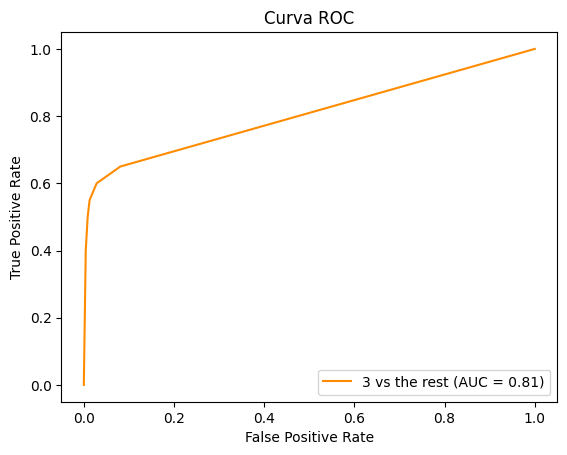

In [46]:
from sklearn.metrics import RocCurveDisplay
classifier=KNeighborsClassifier()
y_score = classifier.fit(X_train, Y_train).predict_proba(X_test)
display = RocCurveDisplay.from_predictions(
    y_onehot_test[:, class_id],
    y_score[:, class_id],
    name=f"{class_of_interest} vs the rest",
    color="darkorange"

)
_ = display.ax_.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title="Curva ROC",
)

In [47]:
from sklearn.metrics import auc, roc_curve

# store the fpr, tpr, and roc_auc for all averaging strategies
fpr, tpr, roc_auc = dict(), dict(), dict()
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_onehot_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

print(f"Micro-averaged One-vs-Rest ROC AUC score:\n{roc_auc['micro']:.2f}")

Micro-averaged One-vs-Rest ROC AUC score:
0.86


In [48]:
n_classes=4
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_onehot_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr_grid = np.linspace(0.0, 1.0, 1000)

# Interpolate all ROC curves at these points
mean_tpr = np.zeros_like(fpr_grid)

for i in range(n_classes):
    mean_tpr += np.interp(fpr_grid, fpr[i], tpr[i])  # linear interpolation

# Average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = fpr_grid
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

print(f"Macro-averaged One-vs-Rest ROC AUC score:\n{roc_auc['macro']:.2f}")

Macro-averaged One-vs-Rest ROC AUC score:
0.65


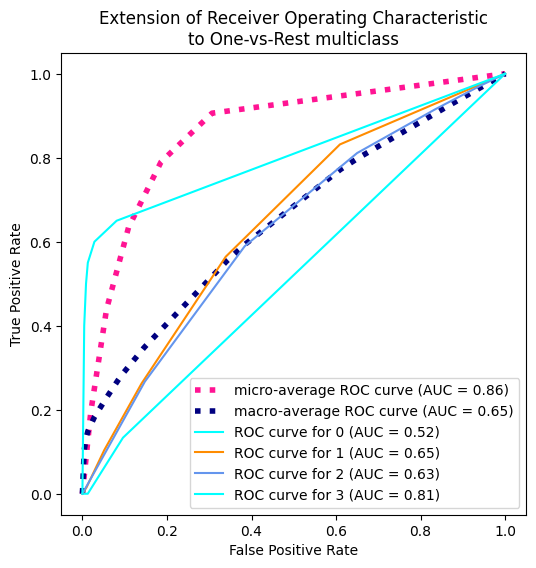

In [49]:
from itertools import cycle
import matplotlib.pyplot as plt

valoracion=[0,1,2,3]
fig, ax = plt.subplots(figsize=(6, 6))

plt.plot(
    fpr["micro"],
    tpr["micro"],
    label=f"micro-average ROC curve (AUC = {roc_auc['micro']:.2f})",
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label=f"macro-average ROC curve (AUC = {roc_auc['macro']:.2f})",
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for class_id, color in zip(range(n_classes), colors):
    RocCurveDisplay.from_predictions(
        y_onehot_test[:, class_id],
        y_score[:, class_id],
        name=f"ROC curve for {valoracion[class_id]}",
        color=color,
        ax=ax
    )

_ = ax.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title="Extension of Receiver Operating Characteristic\nto One-vs-Rest multiclass",
)

En esta gráfica podemos comparar las curvas ROC de las distintas categoría de clasificación de las películas. Las 4 curvas correspondientes a las 4 categorías están comparadas también con las curvas ROC de micro-average y macro-average, cuyos valores de AUC (área bajo la curva) hemos calculado en las celdas anteriores.

### Comente de manera general y comparando entre todos los algoritmos los resultados obtenidos.

ELEGIR ENTRE KNN Y GRADIENT BOOSTING (DA "PERFECTO"-> RARETE)

Atendiendo a las métricas que hemos calculado, podemos ver como el algoritmo con el que mejor accuracy obtenemos es el Random Forest. Otro aspecto a destacar sería que al representar la matriz de confusión de SVC hemos observado que no clasifica correctamente las películas de la clase 0 ni las películas de la clase 1 (ambas tienen TP (true positive) = 0). Esto ocurre en algún otro algoritmo solo que solo con una de las cateogrías en vez de 2. También es interesante comentar que el Gradient Boosting clasifica perfectamente las películas, pero no usaremos este modelo.


# Mejorando nuestros resultados de entrenamiento

En este apartado se va a intentar mejorar los resultados de entrenamiento. Para ello recuerde que hemos visto en la asignatura dos métodos. El primero consiste en emplear diferentes métodos de evaluación. Esto nos permitirá poder entrenar nuestro modelos con diferentes particiones del dataset completo (X, Y) y no sólo emeplear una partición fija como en el caso anterior.

Por otro lado, existen técnicas de optimización de hiperparámetros. Con estas técnicas podemos encontrar los valores óptimos de los hiperparámetros de los algoritmos de Machine Learning de cara a mejorar los resultados.

Implemente en este apartado diferentes métodos de evaluación y optimización de hiperparámetros e intente mejorar los resultados con cada uno de los tres algortimos usados en el apartado anterior. Puede emplear todas las técnicas que considere pero comente siempre los resultados obtenidos en detalle (icluya una celda de texto tras cada parte que desarrolle y comentando cada resultado). Incluya todos los gráficos que considere oprotunos.

*** Nota: Puede ser que no se llegue a conseguir una mejore pero intente probar diferentes técnicas y comente el resultado aunque no sea mejor. Hecho esto pruebe otra técnica. No tiene por qué eliminar el código si el resultado no es satisfactorio. Simplemente realice todos los comentarios que considere.

En primer lugar, hemos utilizado 2 métodos de evaluación como lo son la validación cruzada y el random subsampling. Hemos medido para ambos métodos 5 iteraciones las cuales hemos mostrado por pantalla, además de la media de esos 5 valores.

In [50]:
# Desarrolle el código en los bloques siguientes (utilice todos los que necesite)

In [51]:
from sklearn.model_selection import cross_val_score

# Validación Cruzada para Random Forest Classifier
rf_cv_scores = cross_val_score(rf_model, X, Y.values.ravel(), cv=5)
print("Random Forest Classifier Cross-Validation Scores:", rf_cv_scores)
print("Mean Cross-Validation Score:", rf_cv_scores.mean())

# Validación Cruzada para Support Vector Classifier
svc_cv_scores = cross_val_score(svc_model, X, Y.values.ravel(), cv=5)
print("Support Vector Classifier Cross-Validation Scores:", svc_cv_scores)
print("Mean Cross-Validation Score:", svc_cv_scores.mean())

# Validación Cruzada para K-Nearest Neighbors Classifier
knn_cv_scores = cross_val_score(knn_model, X, Y.values.ravel(), cv=5)
print("K-Nearest Neighbors Classifier Cross-Validation Scores:", knn_cv_scores)
print("Mean Cross-Validation Score:", knn_cv_scores.mean())


# Validación Cruzada para K-Nearest Neighbors Classifier
mlp_cv_scores = cross_val_score(mlp_model, X, Y.values.ravel(), cv=5)
print("MLP Classifier Cross-Validation Scores:", mlp_cv_scores)
print("Mean Cross-Validation Score:", mlp_cv_scores.mean())

Random Forest Classifier Cross-Validation Scores: [0.96823204 0.97237569 0.97790055 0.96957123 0.95988935]
Mean Cross-Validation Score: 0.9695937736411361
Support Vector Classifier Cross-Validation Scores: [0.64502762 0.68093923 0.66574586 0.66390041 0.66251729]
Mean Cross-Validation Score: 0.6636260822386771
K-Nearest Neighbors Classifier Cross-Validation Scores: [0.66022099 0.6698895  0.62154696 0.593361   0.55463347]
Mean Cross-Validation Score: 0.6199303852120156
MLP Classifier Cross-Validation Scores: [0.67127072 0.42127072 0.63121547 0.65975104 0.58367911]
Mean Cross-Validation Score: 0.5934374116442387


In [52]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Función para realizar Random Subsampling
def random_subsampling(model, X, Y, n_iterations=5, test_size=0.2):
    mean_accuracy = []
    for i in range(n_iterations):
        # Dividir los datos en conjuntos de entrenamiento y prueba de manera aleatoria
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=i)

        # Entrenar el modelo
        model.fit(X_train, Y_train)

        # Predecir con el modelo entrenado
        Y_pred = model.predict(X_test)

        # Calcular la precisión de la predicción
        accuracy = accuracy_score(Y_test, Y_pred)

        # Agregar la precisión a la lista de precisión media
        mean_accuracy.append(accuracy)

        # Imprimir la precisión para la iteración actual
        print("Iteration", i+1, "- Accuracy:", accuracy)

    # Calcular la precisión media de todas las iteraciones
    mean_accuracy = sum(mean_accuracy) / n_iterations
    print("Mean Accuracy:", mean_accuracy)

# Realizar Random Subsampling para Random Forest Classifier
print("Random Forest Classifier Random Subsampling:")
random_subsampling(rf_model, X, Y.values.ravel())

# Realizar Random Subsampling para Support Vector Classifier
print("\nSupport Vector Classifier Random Subsampling:")
random_subsampling(svc_model, X, Y.values.ravel())

# Realizar Random Subsampling para K-Nearest Neighbors Classifier
print("\nK-Nearest Neighbors Classifier Random Subsampling:")
random_subsampling(knn_model, X, Y.values.ravel())

# Realizar Random Subsampling para K-Nearest Neighbors Classifier
print("\nMLP Neighbors Classifier Random Subsampling:")
random_subsampling(mlp_model, X, Y.values.ravel())

Random Forest Classifier Random Subsampling:
Iteration 1 - Accuracy: 0.9723756906077348
Iteration 2 - Accuracy: 0.9723756906077348
Iteration 3 - Accuracy: 0.9848066298342542
Iteration 4 - Accuracy: 0.9806629834254144
Iteration 5 - Accuracy: 0.9723756906077348
Mean Accuracy: 0.9765193370165747

Support Vector Classifier Random Subsampling:
Iteration 1 - Accuracy: 0.6906077348066298
Iteration 2 - Accuracy: 0.6657458563535912
Iteration 3 - Accuracy: 0.6767955801104972
Iteration 4 - Accuracy: 0.669889502762431
Iteration 5 - Accuracy: 0.6629834254143646
Mean Accuracy: 0.6732044198895029

K-Nearest Neighbors Classifier Random Subsampling:
Iteration 1 - Accuracy: 0.6671270718232044
Iteration 2 - Accuracy: 0.6408839779005525
Iteration 3 - Accuracy: 0.6450276243093923
Iteration 4 - Accuracy: 0.6395027624309392
Iteration 5 - Accuracy: 0.6477900552486188
Mean Accuracy: 0.6480662983425414

MLP Neighbors Classifier Random Subsampling:
Iteration 1 - Accuracy: 0.6685082872928176
Iteration 2 - Accurac

Para la optimización de hiperparámetros hemos usado distintos métodos de optimización de hiperparámetros como el Random Search (usado para Random Forest)y GridSearch (usado para KNN y MLP).

Con SVC hemos intentado ejecutar con ambos métodos de evaluación pero los tiempos de ejecución eran muy altos y por ello no vamos a usar ese código.

In [53]:
# Random search with Random Forest
from sklearn import ensemble
import numpy as np
from sklearn.model_selection import RandomizedSearchCV

rf = ensemble.RandomForestClassifier()
n_estimators = [int(x) for x in np.linspace(start = 1, stop = 20, num = 20)] # number of trees in the random forest
max_features = ['log2', 'sqrt'] # number of features in consideration at every split
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)] # maximum number of levels allowed in each decision tree
min_samples_split = [2, 6, 10] # minimum sample number to split a node
min_samples_leaf = [1, 3, 4] # minimum sample number that can be stored in a leaf node
bootstrap = [True, False] # method used to sample data points
random_grid = {'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
'bootstrap': bootstrap}
clf = RandomizedSearchCV(estimator=rf, param_distributions=random_grid, n_iter=100, cv=2, verbose=2)
clf.fit(X,Y.values.ravel())
print(clf.cv_results_)
# this prints the contents of the parameters in the random grid
print ('Random grid: ', random_grid, '\n')
# print the best parameters
print ('Best Parameters: ', clf.best_params_, ' \n')
# print the best estimator
print('Best estimator', clf.best_estimator_)
#printing the best score
print('Best score', clf.best_score_)

Fitting 2 folds for each of 100 candidates, totalling 200 fits
[CV] END bootstrap=True, max_depth=60, max_features=log2, min_samples_leaf=3, min_samples_split=10, n_estimators=1; total time=   0.0s
[CV] END bootstrap=True, max_depth=60, max_features=log2, min_samples_leaf=3, min_samples_split=10, n_estimators=1; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=9; total time=   0.1s
[CV] END bootstrap=False, max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=9; total time=   0.1s
[CV] END bootstrap=False, max_depth=110, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=4; total time=   0.0s
[CV] END bootstrap=False, max_depth=110, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=4; total time=   0.0s
[CV] END bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=16; total

In [54]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Inicializar el modelo KNN
knn_model = KNeighborsClassifier()

# Definir el espacio de búsqueda de hiperparámetros
param_grid = {
    'n_neighbors': [3, 5, 7],  # Número de vecinos
    'weights': ['uniform', 'distance'],  # Método de asignación de pesos
    'metric': ['euclidean', 'manhattan']  # Métrica de distancia
}

# Inicializar GridSearchCV
grid_search = GridSearchCV(estimator=knn_model, param_grid=param_grid, cv=5, scoring='accuracy')

# Realizar la búsqueda en la cuadrícula
grid_search.fit(X_train, Y_train.values.ravel())

# Obtener los mejores hiperparámetros y la mejor puntuación
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)


Best Parameters: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}
Best Score: 0.6599835057460961


In [55]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

# Inicializar el modelo MLP
mlp_model = MLPClassifier()

# Definir el espacio de búsqueda de hiperparámetros
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
    'activation': ['relu', 'tanh', 'logistic'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive'],
}

# Inicializar GridSearchCV
grid_search = GridSearchCV(estimator=mlp_model, param_grid=param_grid, cv=5, scoring='accuracy')

# Realizar la búsqueda en la cuadrícula
grid_search.fit(X_train, Y_train.values.ravel())

# Obtener los mejores hiperparámetros y la mejor puntuación
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)


Best Parameters: {'activation': 'logistic', 'alpha': 0.0001, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant'}
Best Score: 0.6503116577322792


### Comente de manera general y comparando entre todos los algoritmos los resultados obtenidos.

Observando los resultados obtenidos podemos ver como hemos conseguido que los algoritmos KNN y MLP mejoren tras aplicarles GridSearch. Sin embargo, en el caso de Random Forest no ha habido mejora, lo cual puede deberse a la utilización del Random Search o por el alto score que ya tenía. Para decir que un algoritmo ha mejorado, hemos comparado el best score con la media de los score que hemos obtenido en los métodos de evaluación.

# Aplicando técnicas de Explicabilidad para entender nuestros algoritmos

Realizado el apartado anterior puede haber conseguido un modelo con grandes prestaciones en cuanto a las métricas empleadas. En este apartado vamos a realizar un nuevo análisis. En este caso vamos a intentar comprender porqué nuestro modelo es tan bueno realizando predicciones y para ello haremos uso de técnicas de explicabilidad de modelos. En la asignatura se han visto gran cantidad de ellas. Se pide en este apartado que seleccione el mejor de los tres modelos que ha conseguido y realice un análisis exhaustivo de explicabilidad de este.

Puede aplicar técnicas de importancia de características, PDP, Curvas ICE, algoritmos LIME y SHAP... Presente todos los resultados que considere oportunos. Por ejemplo, puede emplear LIME para extraer una primera visión de que características son más importantes. Hecho esto puede aplicar los PDP y curvas ICE a estas características más relevantes. Para finalizar puede aplicar SHAP y presentar gran cantidad de plot de todos los que ofrece la librerías.

Se busca un análisis exhaustivo de sus resultados y que presenten gran cantidad de técnicas de cara a realziar un informe de las características más relevantes y como se comportan entre ellas. Analice también que características parecen poco relevante y argumente porqué. Analice además los casos de error en su dataset, filas mal clasificadas, para comprender a que se debe que no se estén clasificando correctamente.

Incluya una celda de texto tras cada desarrollo explicando que está realizando y los resultados que ha obtenido. Incluya tanto grñaficos como pueda y crea necesario.

In [56]:
# Desarrolle el código en los bloques siguientes (utilice todos los que necesite)

En primer lugar, descargamos las librerías necesarias para poder llevar a cabo la explicabilidad del modelo.

In [57]:
pip install pdpbox

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.8/35.8 MB 23.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 68.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 68.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.1/121.1 kB 14.6 MB/s eta 0:00:00
  Attempting uninstall: sphinx
    Found existing installation: Sphinx 5.0.2
    Uninstalling Sphinx-5.0.2:
      Successfully uninstalled Sphinx-5.0.2


In [58]:
pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=5e416cdf7b6ad8d28e40c8aa6170f8e24dbb41779dddd6c70ec9397ea4acfdf3
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [59]:
pip install shap

A lo largo de este apartado, vamos a trabajar con el modelo que hemos considerado como el mejor.

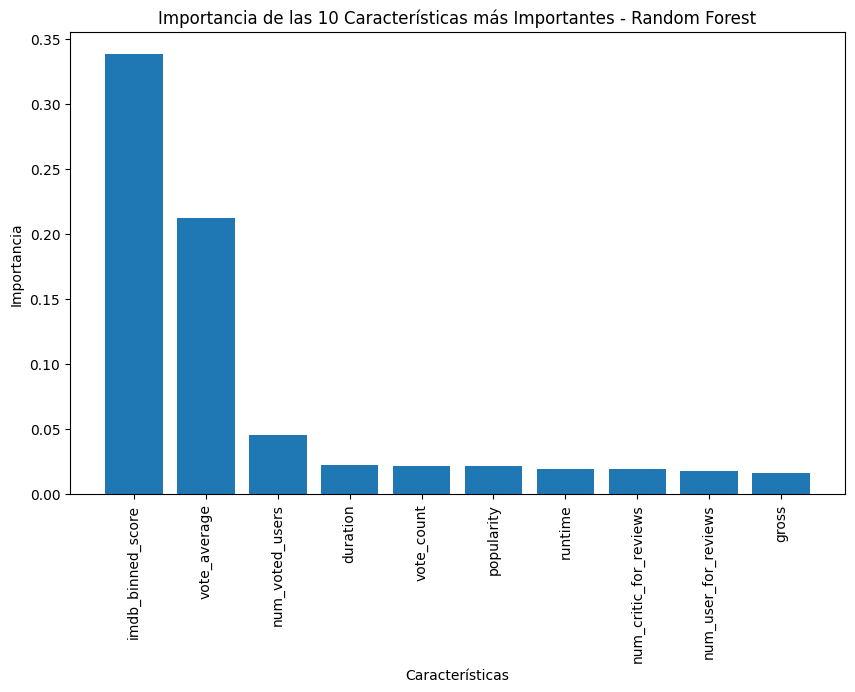

In [60]:
import matplotlib.pyplot as plt

# Calcular la importancia de características
importances = rf_model.feature_importances_

# Obtener nombres de características
feature_names = X.columns

# Ordenar las importancias de características de mayor a menor
indices = np.argsort(importances)[::-1]

# Seleccionar las 10 características más importantes
top_features = feature_names[indices[:10]]

# Visualizar la importancia de características
plt.figure(figsize=(10, 6))
plt.title("Importancia de las 10 Características más Importantes - Random Forest")
plt.bar(range(10), importances[indices[:10]], align="center")
plt.xticks(range(10), top_features, rotation=90)
plt.xlabel("Características")
plt.ylabel("Importancia")
plt.show()




Nos centraremos en el análisis de las 10 características más importantes.



In [61]:
top_features

Index(['imdb_binned_score', 'vote_average', 'num_voted_users', 'duration',
       'vote_count', 'popularity', 'runtime', 'num_critic_for_reviews',
       'num_user_for_reviews', 'gross'],
      dtype='object')

En primer lugar, hemos graficado los gráficos de dependencia parcial. Se muestran 10 gráficas que muestran el impacto de cada una de las 10 columnas más importantes en la salida del modelo Random Forest.

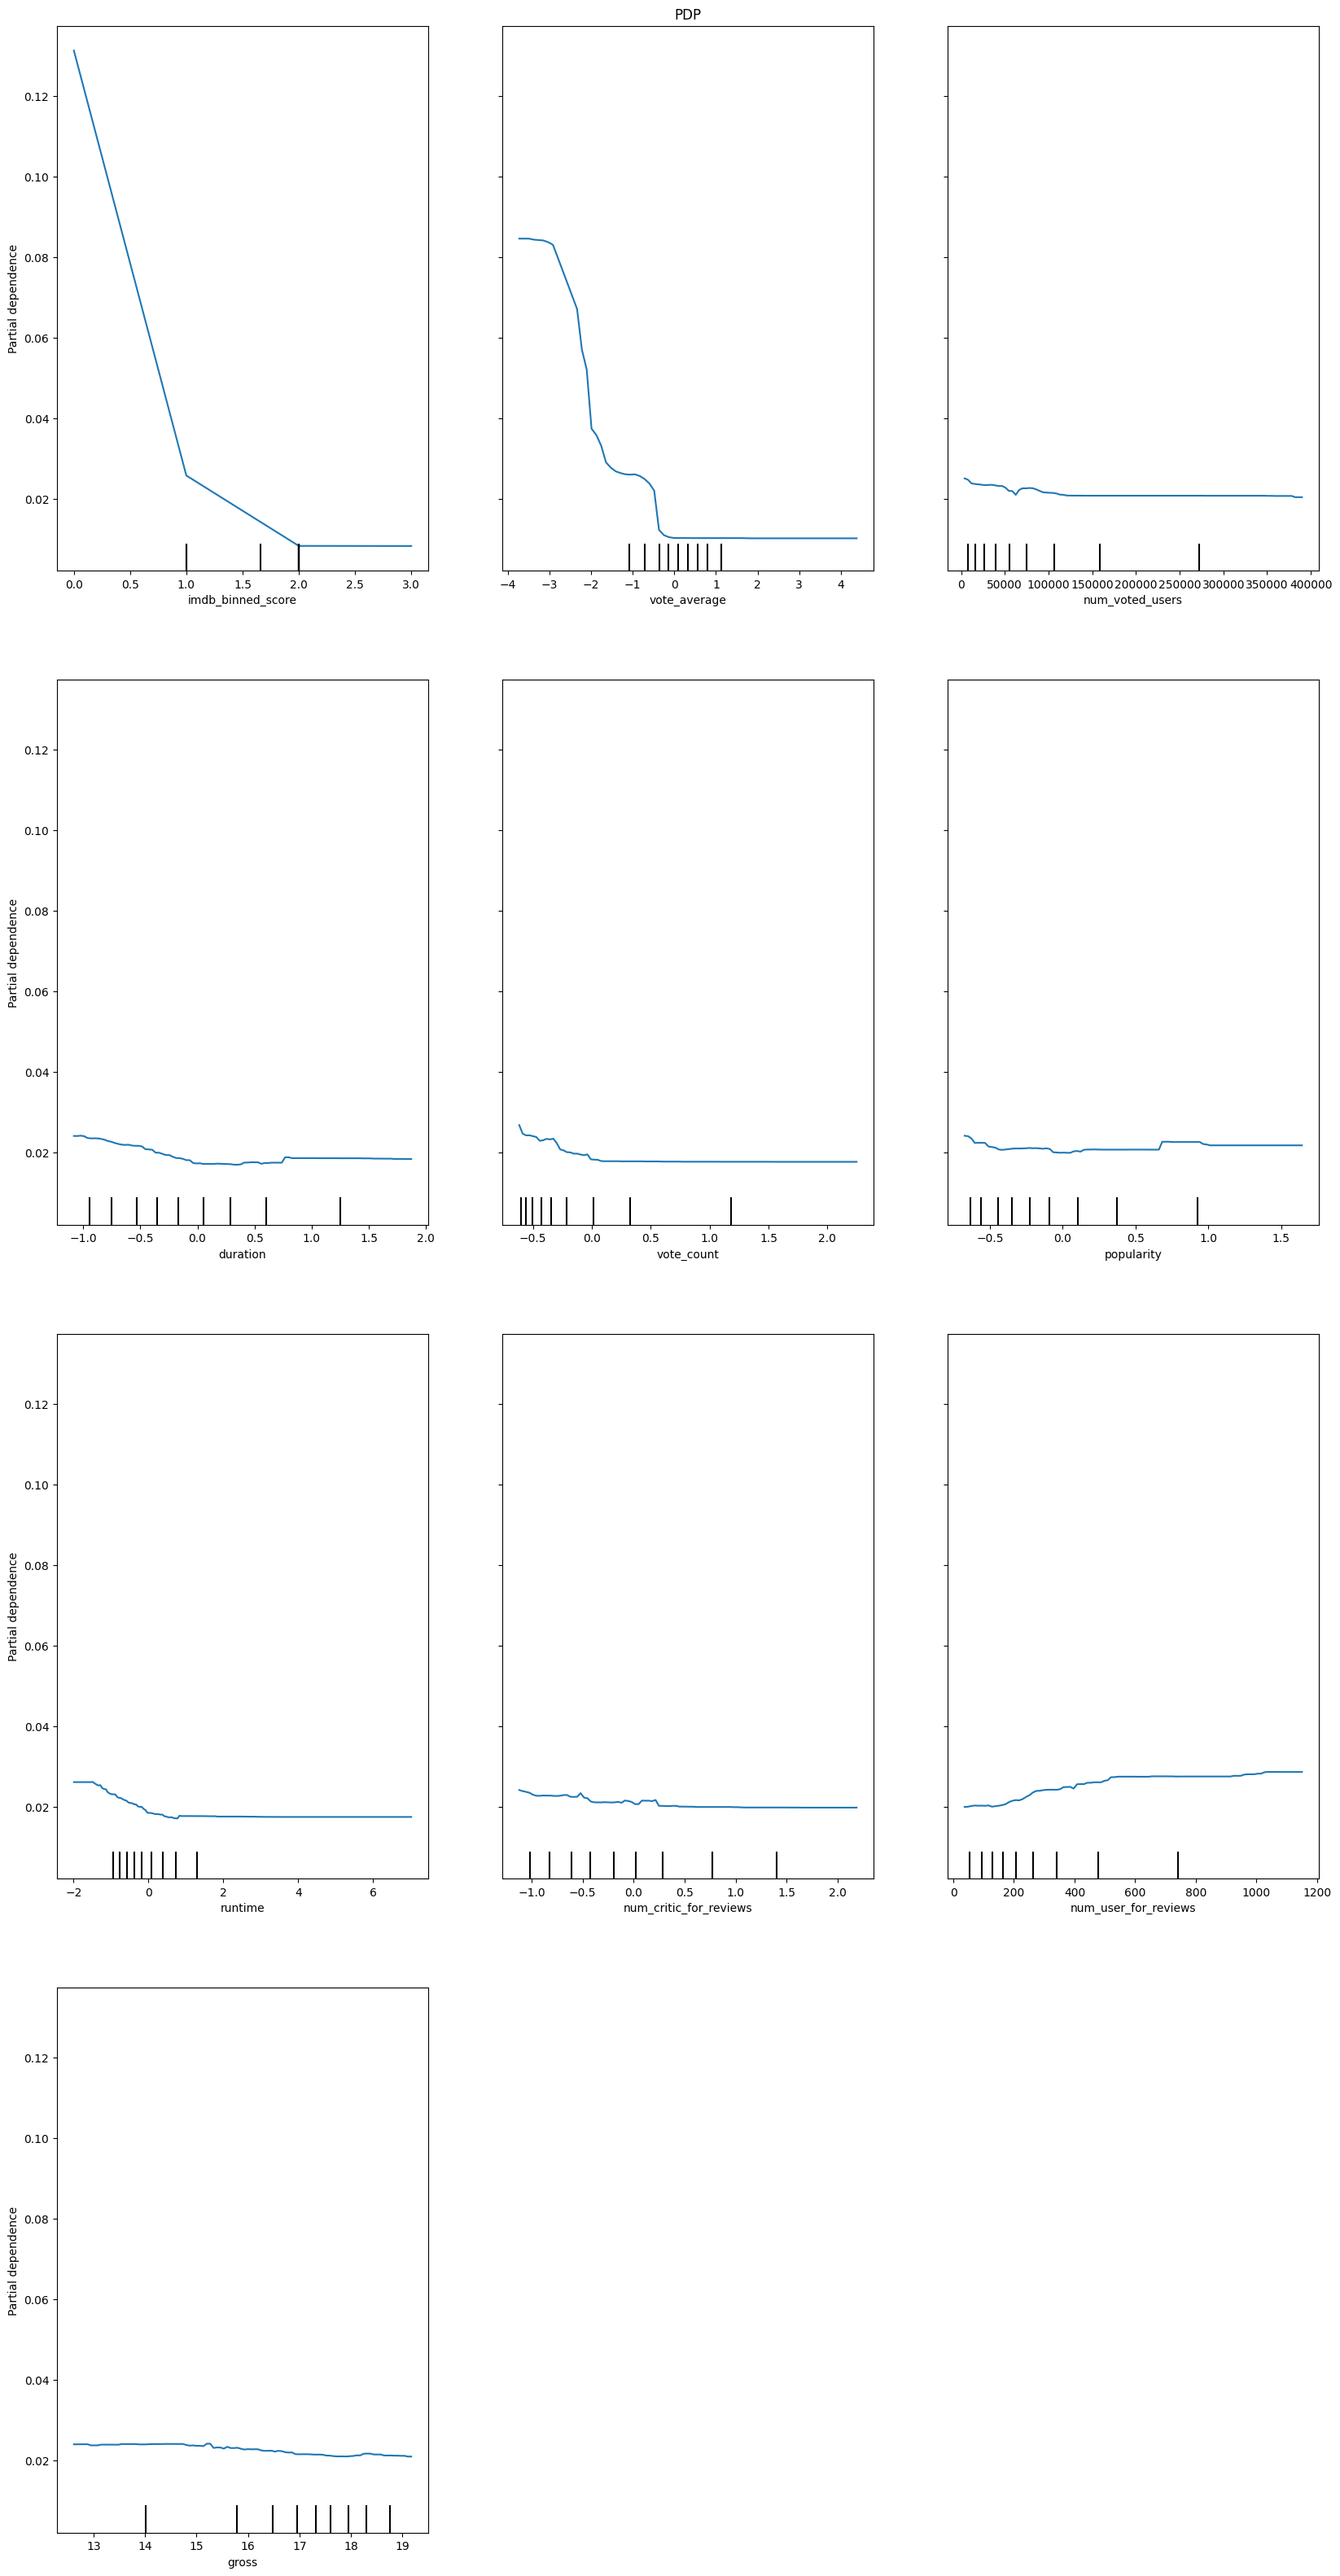

In [62]:
from sklearn.inspection import PartialDependenceDisplay
from sklearn.inspection import partial_dependence
features = top_features

results = partial_dependence(rf_model, X_test, [0, 1], kind='average')
'''
print(results["average"])
print(results["values"])
'''
fig, ax = plt.subplots(figsize=(20, 40))
ax.set_title("PDP")
target_class_index = 0  # Índice de la clase objetivo que deseas investigar
display = PartialDependenceDisplay.from_estimator(rf_model, X_test, features, target=target_class_index, ax=ax)


A continuación, vamos a representar los gráficos ICE de las 10 características más importantes. En naranja se muestra la media de todas las filas y en azul se muestra lo correspondiente a cada columna.

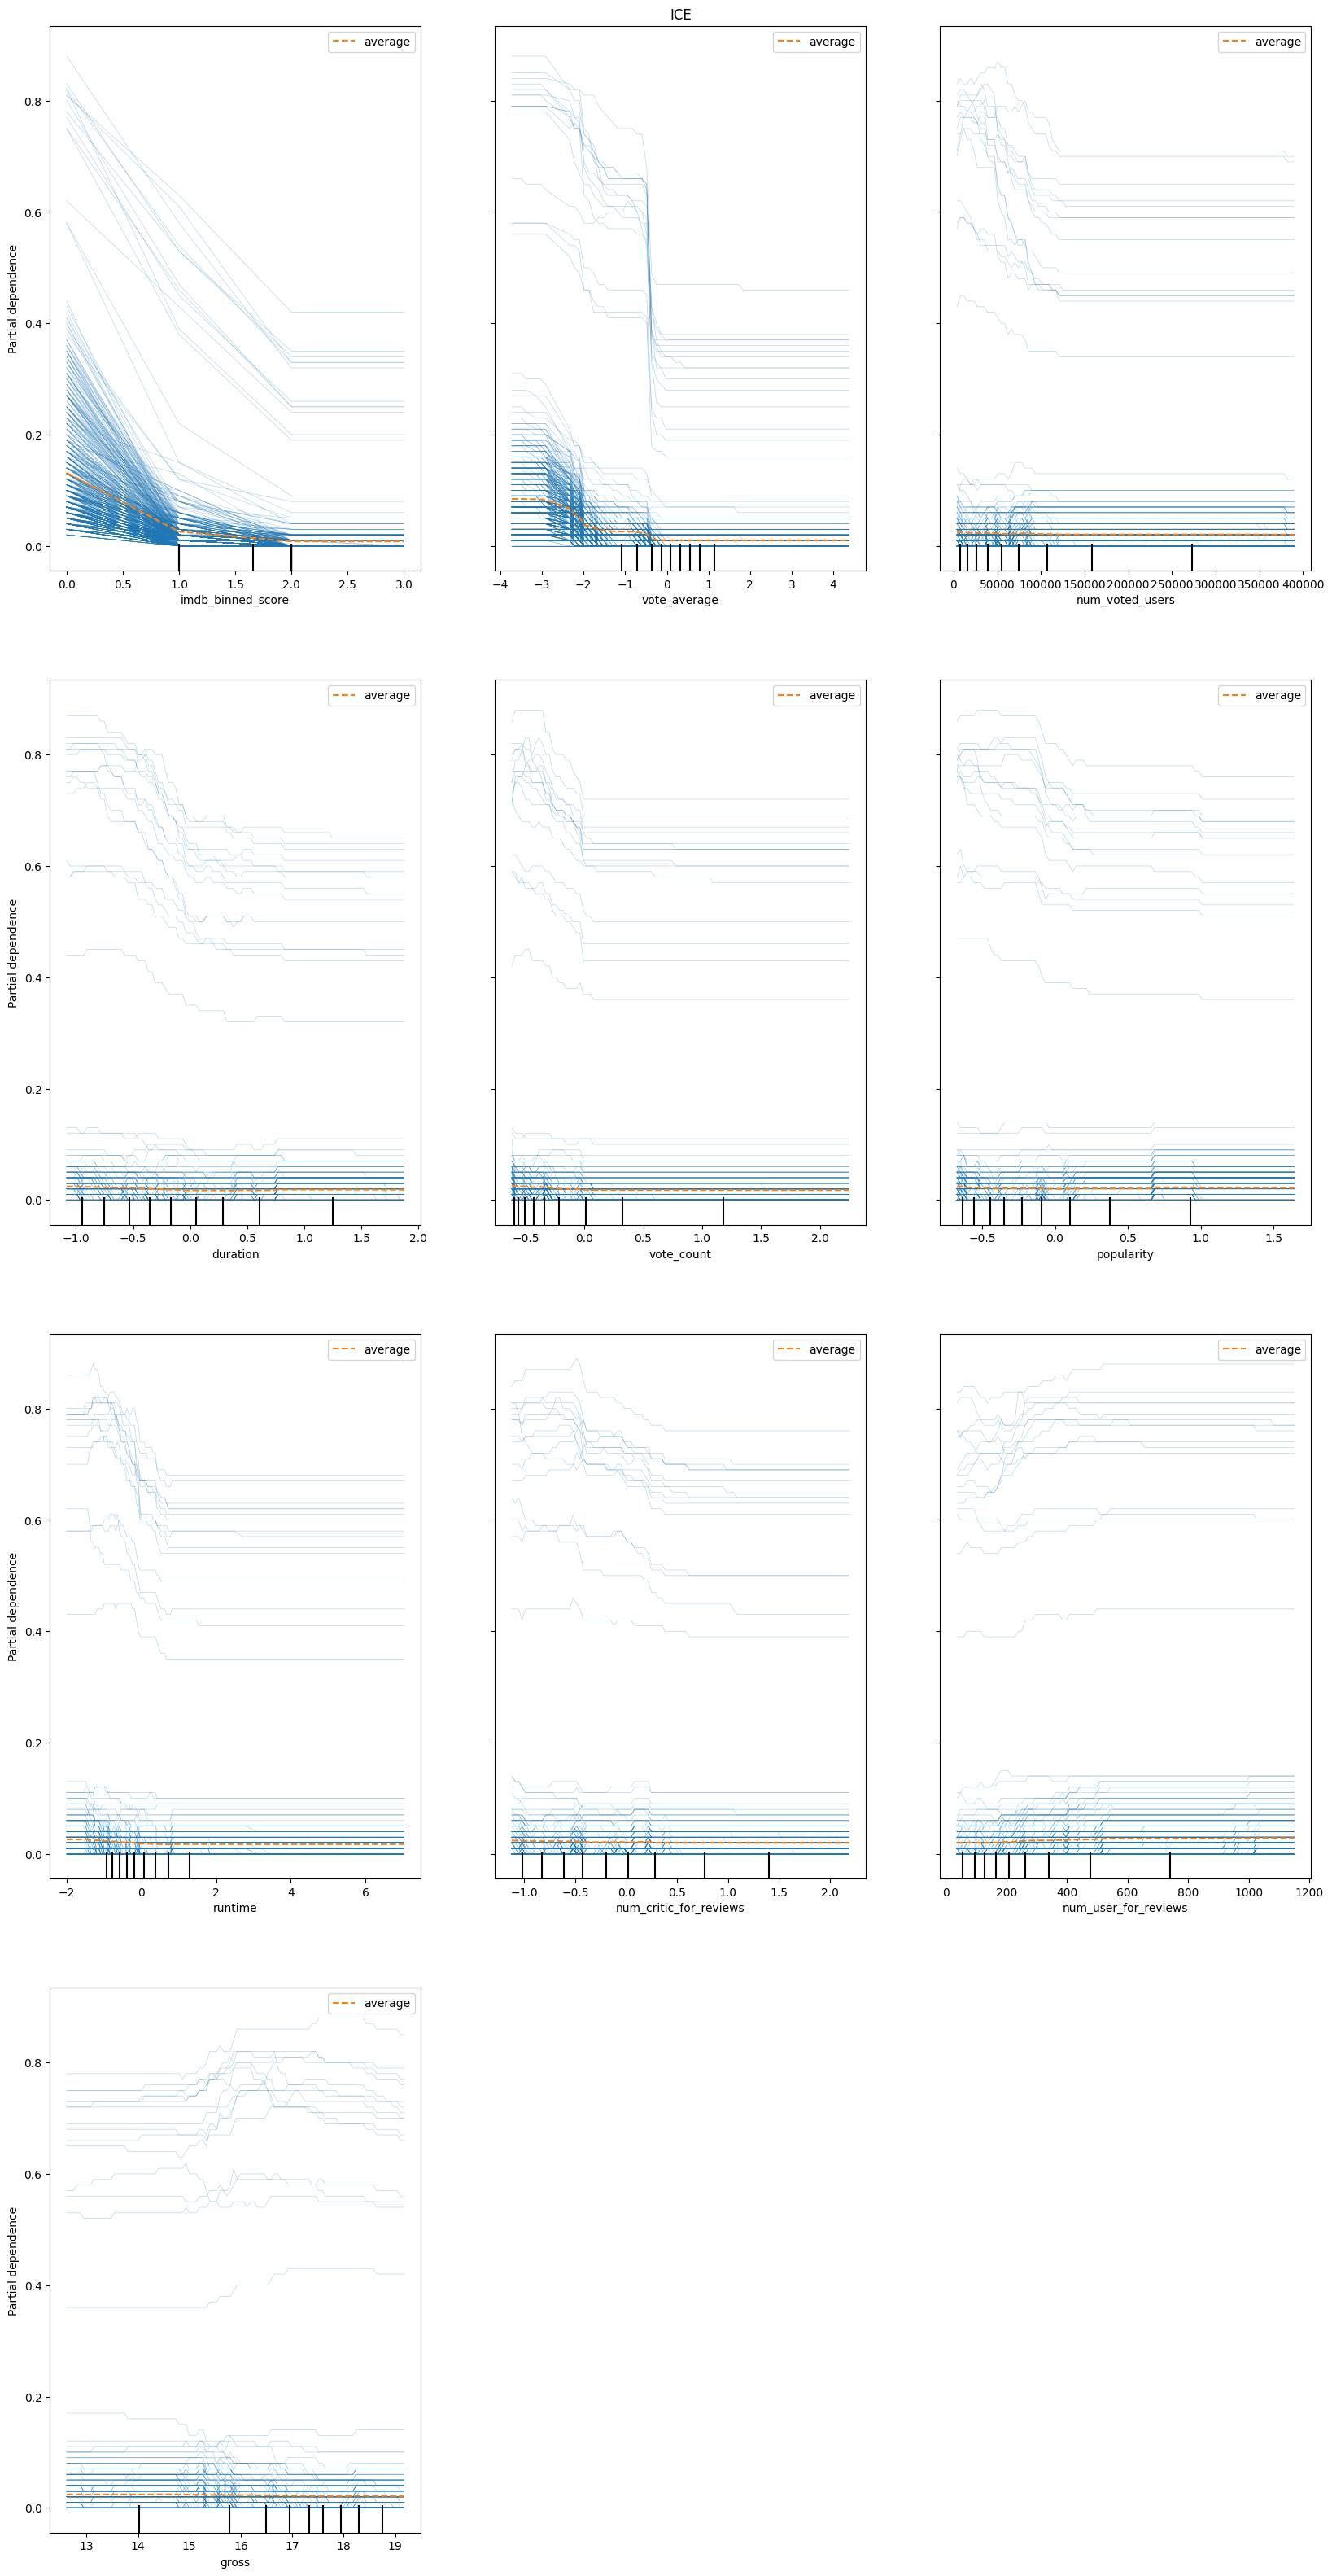

In [63]:
from sklearn.inspection import PartialDependenceDisplay
fig, ax = plt.subplots(figsize=(20, 40))
features = top_features
ax.set_title("ICE")
target_class_index = 0  # Índice de la clase objetivo que deseas investigar
display = PartialDependenceDisplay.from_estimator(rf_model, X_test, features, target=target_class_index, ax=ax, kind="both")


Lo siguiente va a ser trabajar con LIME. Con este método trataremos de explicar las distintas importancias de las columnas que hemos elegido.

In [64]:
import lime
from lime import lime_tabular

explainer = lime_tabular.LimeTabularExplainer(X_train.values, feature_names=X_train.columns, discretize_continuous=True, mode='classification')

In [65]:
X_test.iloc[0][:5]

num_critic_for_reviews     1.420225
duration                  -0.671374
director_facebook_likes   -0.255636
actor_3_facebook_likes    -0.212796
actor_1_facebook_likes    -0.469050
Name: 3449, dtype: float64

In [66]:
i = 0 # Select sample for explanaition
inst=X_test.iloc[[i]].values[0]
exp = explainer.explain_instance(inst, rf_model.predict_proba, num_features=168)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [67]:
exp.show_in_notebook(show_table=True)

In [68]:
exp.as_list()

[('1.00 < imdb_binned_score <= 2.00', -0.4285069685968491),
 ('country_Italy <= 0.00', 0.1827132081024611),
 ('country_South Korea <= 0.00', 0.15202522122507417),
 ('country_Norway <= 0.00', 0.12389638180397955),
 ('country_Denmark <= 0.00', 0.10428670797843928),
 ('language_Cantonese <= 0.00', -0.07946648652899628),
 ('language_German <= 0.00', -0.07309171641903323),
 ('country_China <= 0.00', 0.07092547827664827),
 ('-0.02 < vote_average <= 0.67', -0.07032912595639514),
 ('country_New Line <= 0.00', -0.06552440700379718),
 ('language_Portuguese <= 0.00', 0.06454098068775972),
 ('content_rating_NC-17 <= 0.00', 0.0626816161222318),
 ('language_es <= 0.00', -0.06108177044999833),
 ('country_Chile <= 0.00', -0.06018081124219668),
 ('country_Official site <= 0.00', -0.05968654018257641),
 ('language_ko <= 0.00', 0.05768174813118234),
 ('language_de <= 0.00', -0.05542061372575227),
 ('content_rating_Unrated <= 0.00', 0.05006373069376603),
 ('language_French <= 0.00', 0.04963738978150374),


In [69]:
import shap

El SHAP nos permite explicar la importancia de las distintas características usando un enfoque distinto al de LIME. En este caso, SHAP explica una instancia como la suma de las contribuciones de las distintas características individuales.

100%|===================| 2891/2896 [01:02<00:00]       

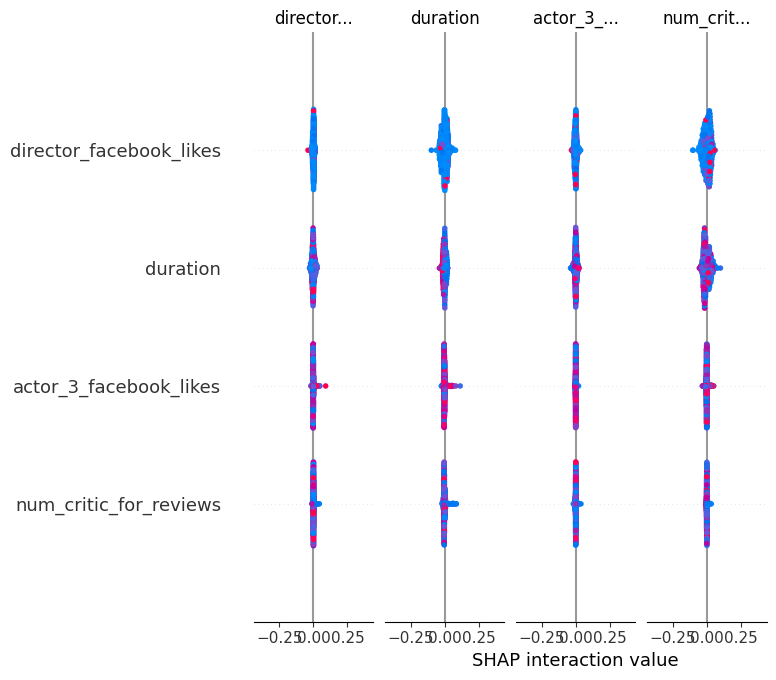

"\nshap.initjs()\nshap.plots.scatter(shap_values[:,'duration'])\n#shap.initjs()\nexplainer = shap.Explainer(best_model)\nsv = explainer(X_test)\nexp = shap.Explanation(sv, sv.base_values, X_train, feature_names=X_test.columns)\n#shap.waterfall_plot(exp[ind])\n#shap.plots.waterfall(shap_values[0,0])\nshap.initjs()\n# make a standard partial dependence plot\nbackground = shap.maskers.Independent(X_test, max_samples=1000)\nexplainer = shap.Explainer(best_model.predict, background)\nshap_values = explainer(X_test)\n\n\nsample_ind = 18\nfig,ax = shap.partial_dependence_plot(\n    'duration', best_model.predict, X_test, model_expected_value=True,\n    feature_expected_value=True, show=False, ice=False,\n    shap_values=shap_values[sample_ind:sample_ind+1,:]\n)\n"

In [71]:
# Calcular los valores SHAP
best_model=rf_model
explainer = shap.Explainer(best_model, X_train)
shap_values = explainer(X_test,check_additivity=False)

# Mostrar el resumen de los valores SHAP
shap.summary_plot(shap_values, X_test, feature_names=X_train.columns)
# Mostrar un gráfico de dispersión de SHAP
'''
shap.initjs()
shap.plots.scatter(shap_values[:,'duration'])
#shap.initjs()
explainer = shap.Explainer(best_model)
sv = explainer(X_test)
exp = shap.Explanation(sv, sv.base_values, X_train, feature_names=X_test.columns)
#shap.waterfall_plot(exp[ind])
#shap.plots.waterfall(shap_values[0,0])
shap.initjs()
# make a standard partial dependence plot
background = shap.maskers.Independent(X_test, max_samples=1000)
explainer = shap.Explainer(best_model.predict, background)
shap_values = explainer(X_test)


sample_ind = 18
fig,ax = shap.partial_dependence_plot(
    'duration', best_model.predict, X_test, model_expected_value=True,
    feature_expected_value=True, show=False, ice=False,
    shap_values=shap_values[sample_ind:sample_ind+1,:]
)
'''

### Comente de manera general y comparando entre todos los algoritmos los resultados obtenidos.

En la gráfica de las características más importantes hemos obtenido que las características más importantes son imdb_binned_score y vote average. Esto lo hemos podido confirmar posteriormente al analizar la explicabilidad de las características más importantes, volviendo a ser estas 2 características las más importantes a la hora de clasificar las películas.